<a href="https://colab.research.google.com/github/sagihaider/EEG_Deep/blob/master/main_Single_Trial_Classification_PatientData_Binary_NSL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/sagihaider/EEG_Deep.git

Cloning into 'EEG_Deep'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 260 (delta 6), reused 0 (delta 0), pack-reused 247
Receiving objects: 100% (260/260), 1.07 GiB | 34.65 MiB/s, done.
Resolving deltas: 100% (110/110), done.
Checking out files: 100% (72/72), done.


In [2]:
import scipy.io as spio
import numpy as np
from importlib.machinery import SourceFileLoader

# EEGNet-specific imports
from EEG_Deep.EEGModels import EEGNet, ShallowConvNet, DeepConvNet, EEGNet_Patient
from tensorflow.keras import utils as np_utils
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K
K.set_image_data_format('channels_first')

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

# tools for plotting confusion matrices
from matplotlib import pyplot as plt
from scipy.signal import butter, lfilter

!pip install neural_structured_learning
import tensorflow as tf
import neural_structured_learning as nsl

     |████████████████████████████████| 112kB 6.5MB/s 


In [0]:
# Band-pass Filter
def butter_bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y


In [0]:
class HParams(object):
  """Hyperparameters used for training."""
  def __init__(self):
    ### eval parameters
    self.eval_steps = 1  # All instances in the test set are evaluated.

HPARAMS = HParams()

EEG_Deep/Data2A/Data_A01T.mat
(288, 22, 1875)
(288, 1)
(240, 22, 750)
(240, 1)
(47, 22, 750)
(47, 1)
X_train shape: (240, 1, 22, 750)
240 train samples
47 val samples
EEG_Deep/Data2A/Data_A01E.mat
(288, 22, 1875)
(288, 1)
(288, 22, 750)
(288, 1)
X_train shape: (288, 1, 22, 750)
288 train samples
Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Train on 8 steps, validate on 2 steps
Epoch 1/300
8/8 [==============================] - 7s 833ms/step - loss: 1.3752 - categorical_crossentropy: 1.3752 - categorical_accuracy: 0.3417 - val_loss: 1.3861 - val_categorical_crossentropy: 1.3861 - val_categorical_accuracy: 0.2766
Epoch 2/300
8/8 [==============================] - 0s 17ms/step - loss: 1.3679 - categorical_crossentropy: 1.3679 - categorical_accuracy: 0.3042 - val_loss: 1.3847 - val_categorical_crossentropy: 1.3847 - val_categorical_accuracy: 0.3404
Epoch 3/300
8/8 [==============================] - 0s 17ms/step - loss: 1.3497 - categorical_crossentropy:

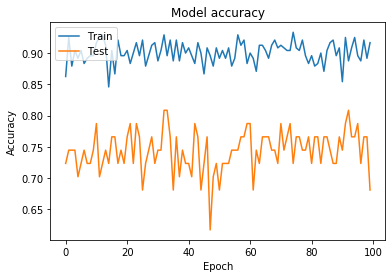


# Evaluate on test data
9/9 [==============================] - 0s 15ms/step - loss: 0.5961 - categorical_crossentropy: 0.5961 - categorical_accuracy: 0.7083
test loss, test acc: [0.5961222251256307, 0.5961222, 0.7083333]



EEG_Deep/Data2A/Data_A02T.mat


Using TensorFlow backend.


(288, 22, 1875)
(288, 1)
(240, 22, 750)
(240, 1)
(47, 22, 750)
(47, 1)
X_train shape: (240, 1, 22, 750)
240 train samples
47 val samples
EEG_Deep/Data2A/Data_A02E.mat
(288, 22, 1875)
(288, 1)
(288, 22, 750)
(288, 1)
X_train shape: (288, 1, 22, 750)
288 train samples
Train on 8 steps, validate on 2 steps
Epoch 1/300
8/8 [==============================] - 1s 69ms/step - loss: 1.4141 - categorical_crossentropy: 1.4141 - categorical_accuracy: 0.2458 - val_loss: 1.3843 - val_categorical_crossentropy: 1.3843 - val_categorical_accuracy: 0.2340
Epoch 2/300
8/8 [==============================] - 0s 18ms/step - loss: 1.3642 - categorical_crossentropy: 1.3642 - categorical_accuracy: 0.3083 - val_loss: 1.3846 - val_categorical_crossentropy: 1.3846 - val_categorical_accuracy: 0.2128
Epoch 3/300
8/8 [==============================] - 0s 17ms/step - loss: 1.3612 - categorical_crossentropy: 1.3612 - categorical_accuracy: 0.3375 - val_loss: 1.3847 - val_categorical_crossentropy: 1.3847 - val_categorica

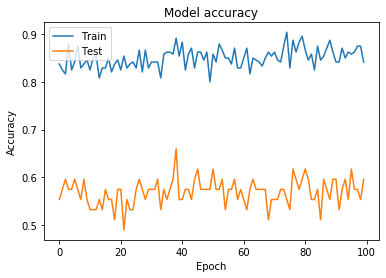


# Evaluate on test data
9/9 [==============================] - 0s 16ms/step - loss: 1.2021 - categorical_crossentropy: 1.2021 - categorical_accuracy: 0.5833
test loss, test acc: [1.2021102905273438, 1.2021103, 0.5833333]
EEG_Deep/Data2A/Data_A03T.mat
(288, 22, 1875)
(288, 1)
(240, 22, 750)
(240, 1)
(47, 22, 750)
(47, 1)
X_train shape: (240, 1, 22, 750)
240 train samples
47 val samples
EEG_Deep/Data2A/Data_A03E.mat
(288, 22, 1875)
(288, 1)
(288, 22, 750)
(288, 1)
X_train shape: (288, 1, 22, 750)
288 train samples
Train on 8 steps, validate on 2 steps
Epoch 1/300
8/8 [==============================] - 1s 64ms/step - loss: 1.4043 - categorical_crossentropy: 1.4043 - categorical_accuracy: 0.2500 - val_loss: 1.3858 - val_categorical_crossentropy: 1.3858 - val_categorical_accuracy: 0.2766
Epoch 2/300
8/8 [==============================] - 0s 18ms/step - loss: 1.3683 - categorical_crossentropy: 1.3683 - categorical_accuracy: 0.3375 - val_loss: 1.3851 - val_categorical_crossentropy: 1.3851 - 

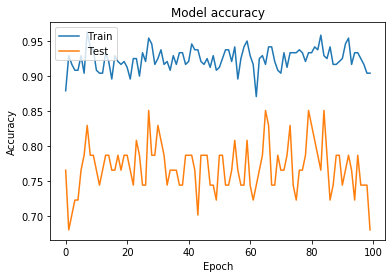


# Evaluate on test data
9/9 [==============================] - 0s 15ms/step - loss: 0.5184 - categorical_crossentropy: 0.5184 - categorical_accuracy: 0.7743
test loss, test acc: [0.518392393986384, 0.5183924, 0.7743056]
EEG_Deep/Data2A/Data_A04T.mat
(288, 22, 1875)
(288, 1)
(240, 22, 750)
(240, 1)
(47, 22, 750)
(47, 1)
X_train shape: (240, 1, 22, 750)
240 train samples
47 val samples
EEG_Deep/Data2A/Data_A04E.mat
(288, 22, 1875)
(288, 1)
(288, 22, 750)
(288, 1)
X_train shape: (288, 1, 22, 750)
288 train samples
Train on 8 steps, validate on 2 steps
Epoch 1/300
8/8 [==============================] - 1s 65ms/step - loss: 1.3900 - categorical_crossentropy: 1.3900 - categorical_accuracy: 0.2875 - val_loss: 1.3925 - val_categorical_crossentropy: 1.3925 - val_categorical_accuracy: 0.2553
Epoch 2/300
8/8 [==============================] - 0s 17ms/step - loss: 1.3797 - categorical_crossentropy: 1.3797 - categorical_accuracy: 0.2708 - val_loss: 1.3891 - val_categorical_crossentropy: 1.3891 - v

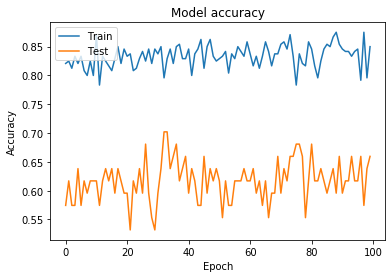


# Evaluate on test data
9/9 [==============================] - 0s 14ms/step - loss: 0.9038 - categorical_crossentropy: 0.9038 - categorical_accuracy: 0.6354
test loss, test acc: [0.9038396345244514, 0.90383965, 0.6354167]
EEG_Deep/Data2A/Data_A05T.mat
(288, 22, 1875)
(288, 1)
(240, 22, 750)
(240, 1)
(47, 22, 750)
(47, 1)
X_train shape: (240, 1, 22, 750)
240 train samples
47 val samples
EEG_Deep/Data2A/Data_A05E.mat
(288, 22, 1875)
(288, 1)
(288, 22, 750)
(288, 1)
X_train shape: (288, 1, 22, 750)
288 train samples
Train on 8 steps, validate on 2 steps
Epoch 1/300
8/8 [==============================] - 1s 63ms/step - loss: 1.4164 - categorical_crossentropy: 1.4164 - categorical_accuracy: 0.2417 - val_loss: 1.3896 - val_categorical_crossentropy: 1.3896 - val_categorical_accuracy: 0.3191
Epoch 2/300
8/8 [==============================] - 0s 15ms/step - loss: 1.3854 - categorical_crossentropy: 1.3854 - categorical_accuracy: 0.2333 - val_loss: 1.3878 - val_categorical_crossentropy: 1.3878 -

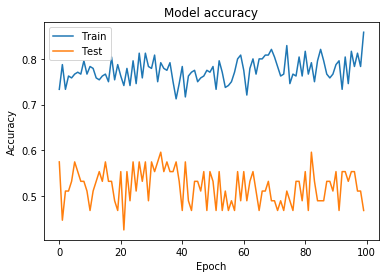


# Evaluate on test data
9/9 [==============================] - 0s 14ms/step - loss: 1.3245 - categorical_crossentropy: 1.3245 - categorical_accuracy: 0.4444
test loss, test acc: [1.3245172500610352, 1.3245173, 0.44444445]
EEG_Deep/Data2A/Data_A06T.mat
(288, 22, 1875)
(288, 1)
(240, 22, 750)
(240, 1)
(47, 22, 750)
(47, 1)
X_train shape: (240, 1, 22, 750)
240 train samples
47 val samples
EEG_Deep/Data2A/Data_A06E.mat
(288, 22, 1875)
(288, 1)
(288, 22, 750)
(288, 1)
X_train shape: (288, 1, 22, 750)
288 train samples
Train on 8 steps, validate on 2 steps
Epoch 1/300
8/8 [==============================] - 0s 60ms/step - loss: 1.4196 - categorical_crossentropy: 1.4196 - categorical_accuracy: 0.2208 - val_loss: 1.3829 - val_categorical_crossentropy: 1.3829 - val_categorical_accuracy: 0.2766
Epoch 2/300
8/8 [==============================] - 0s 16ms/step - loss: 1.3758 - categorical_crossentropy: 1.3758 - categorical_accuracy: 0.2792 - val_loss: 1.3822 - val_categorical_crossentropy: 1.3822 -

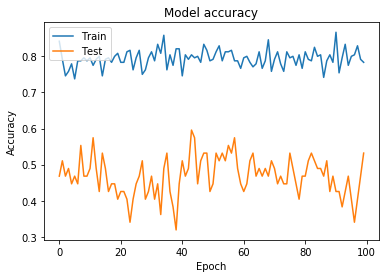


# Evaluate on test data
9/9 [==============================] - 0s 16ms/step - loss: 1.3218 - categorical_crossentropy: 1.3218 - categorical_accuracy: 0.4583
test loss, test acc: [1.3217956225077312, 1.3217956, 0.45833334]
EEG_Deep/Data2A/Data_A07T.mat
(288, 22, 1875)
(288, 1)
(240, 22, 750)
(240, 1)
(47, 22, 750)
(47, 1)
X_train shape: (240, 1, 22, 750)
240 train samples
47 val samples
EEG_Deep/Data2A/Data_A07E.mat
(288, 22, 1875)
(288, 1)
(288, 22, 750)
(288, 1)
X_train shape: (288, 1, 22, 750)
288 train samples
Train on 8 steps, validate on 2 steps
Epoch 1/300
8/8 [==============================] - 1s 66ms/step - loss: 1.4061 - categorical_crossentropy: 1.4061 - categorical_accuracy: 0.2625 - val_loss: 1.3851 - val_categorical_crossentropy: 1.3851 - val_categorical_accuracy: 0.3617
Epoch 2/300
8/8 [==============================] - 0s 16ms/step - loss: 1.3748 - categorical_crossentropy: 1.3748 - categorical_accuracy: 0.3083 - val_loss: 1.3843 - val_categorical_crossentropy: 1.3843 -

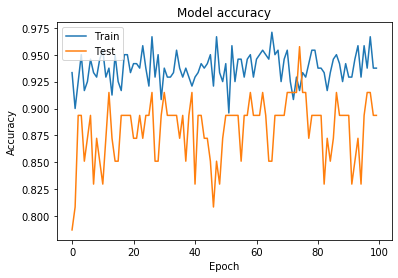


# Evaluate on test data
9/9 [==============================] - 0s 14ms/step - loss: 0.6121 - categorical_crossentropy: 0.6121 - categorical_accuracy: 0.7951
test loss, test acc: [0.6120647225115035, 0.6120648, 0.7951389]
EEG_Deep/Data2A/Data_A08T.mat
(288, 22, 1875)
(288, 1)
(240, 22, 750)
(240, 1)
(47, 22, 750)
(47, 1)
X_train shape: (240, 1, 22, 750)
240 train samples
47 val samples
EEG_Deep/Data2A/Data_A08E.mat
(288, 22, 1875)
(288, 1)
(288, 22, 750)
(288, 1)
X_train shape: (288, 1, 22, 750)
288 train samples
Train on 8 steps, validate on 2 steps
Epoch 1/300
8/8 [==============================] - 0s 62ms/step - loss: 1.3897 - categorical_crossentropy: 1.3897 - categorical_accuracy: 0.3292 - val_loss: 1.3854 - val_categorical_crossentropy: 1.3854 - val_categorical_accuracy: 0.2553
Epoch 2/300
8/8 [==============================] - 0s 17ms/step - loss: 1.3552 - categorical_crossentropy: 1.3552 - categorical_accuracy: 0.3542 - val_loss: 1.3817 - val_categorical_crossentropy: 1.3817 - 

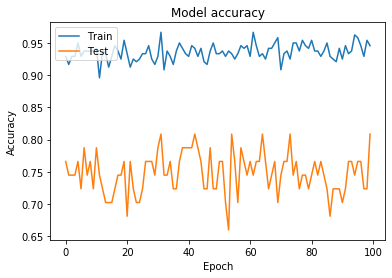


# Evaluate on test data
9/9 [==============================] - 0s 15ms/step - loss: 0.6106 - categorical_crossentropy: 0.6106 - categorical_accuracy: 0.7535
test loss, test acc: [0.6105640033880869, 0.610564, 0.7534722]
EEG_Deep/Data2A/Data_A09T.mat
(288, 22, 1875)
(288, 1)
(240, 22, 750)
(240, 1)
(47, 22, 750)
(47, 1)
X_train shape: (240, 1, 22, 750)
240 train samples
47 val samples
EEG_Deep/Data2A/Data_A09E.mat
(288, 22, 1875)
(288, 1)
(288, 22, 750)
(288, 1)
X_train shape: (288, 1, 22, 750)
288 train samples
Train on 8 steps, validate on 2 steps
Epoch 1/300
8/8 [==============================] - 0s 61ms/step - loss: 1.4051 - categorical_crossentropy: 1.4051 - categorical_accuracy: 0.2458 - val_loss: 1.3761 - val_categorical_crossentropy: 1.3761 - val_categorical_accuracy: 0.2340
Epoch 2/300
8/8 [==============================] - 0s 18ms/step - loss: 1.3525 - categorical_crossentropy: 1.3525 - categorical_accuracy: 0.3542 - val_loss: 1.3692 - val_categorical_crossentropy: 1.3692 - v

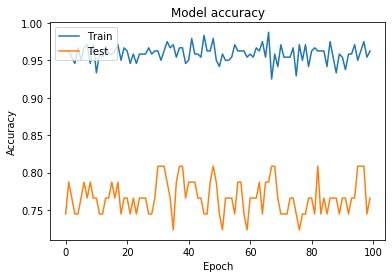


# Evaluate on test data
9/9 [==============================] - 0s 14ms/step - loss: 0.5556 - categorical_crossentropy: 0.5556 - categorical_accuracy: 0.7847
test loss, test acc: [0.5555974245071411, 0.5555974, 0.7847222]
[[0.59612221 0.70833331]
 [1.20211029 0.58333331]
 [0.51839238 0.77430558]
 [0.90383965 0.63541669]
 [1.32451725 0.44444445]
 [1.32179558 0.45833334]
 [0.61206478 0.7951389 ]
 [0.61056399 0.75347221]
 [0.55559742 0.78472221]]


<Figure size 432x288 with 0 Axes>

In [5]:
from numpy import zeros
K.clear_session()
cols = 2
rows = 9
acc_all = zeros([rows, cols])
X_tr = np.empty([288, 22, 1875])
X_ts = np.empty([288, 22, 1875])


for x in range(1,10):
  fName = 'EEG_Deep/Data2A/Data_A0' + str(x) + 'T.mat'  # Load Data
  print(fName)
  mat = spio.loadmat(fName)
  r_X_tr = mat['cleanRawEEGData']
  y_tr = mat['cleanClassLabels']
  
  print(np.shape(r_X_tr))
  print(np.shape(y_tr))

  for t in range(r_X_tr.shape[0]):
    tril = r_X_tr[t,:,:]
    # tril = tril.transpose()
    tril_filtered = butter_bandpass_filter(tril, 
                                              lowcut=4, 
                                              highcut=40, 
                                              fs=250,
                                              order=4)
    # tril_filtered = tril_filtered.transpose()
    X_tr[t,:,:] = tril_filtered 
    
  # split data of each subject in training and validation
  X_train      = X_tr[0:240,:,500:1250]
  Y_train      = y_tr[0:240]
  X_val       = X_tr[241:,:,500:1250]
  Y_val       = y_tr[241:]

  print(np.shape(X_train))
  print(np.shape(Y_train))
  print(np.shape(X_val))
  print(np.shape(Y_val))
  
  # convert labels to one-hot encodings.
  Y_train      = np_utils.to_categorical(Y_train-1)
  Y_val       = np_utils.to_categorical(Y_val-1)

  kernels, chans, samples = 1, 22, 750
  # convert data to NCHW (trials, kernels, channels, samples) format. Data 
  # contains 22 channels and 500 time-points. Set the number of kernels to 1.
  X_train      = X_train.reshape(X_train.shape[0], kernels, chans, samples)
  X_val       = X_val.reshape(X_val.shape[0], kernels, chans, samples)
   
  print('X_train shape:', X_train.shape)
  print(X_train.shape[0], 'train samples')
  print(X_val.shape[0], 'val samples')

  # Load test data         
  fName = 'EEG_Deep/Data2A/Data_A0' + str(x) + 'E.mat'  # Load Data
  print(fName)
  mat = spio.loadmat(fName)
  r_X_ts = mat['cleanRawEEGData']
  y_ts = mat['cleanClassLabels']

  print(np.shape(r_X_ts))
  print(np.shape(y_ts))

  for t in range(r_X_ts.shape[0]):
    tril = r_X_ts[t,:,:]
    # tril = tril.transpose()
    tril_filtered = butter_bandpass_filter(tril, 
                                              lowcut=4, 
                                              highcut=40, 
                                              fs=250,
                                              order=4)
    # tril_filtered = tril_filtered.transpose()
    X_ts[t,:,:] = tril_filtered 

  X_test      = X_ts[:,:,500:1250]
  Y_test      = y_ts[:]
  print(np.shape(X_test))
  print(np.shape(Y_test))

  #convert labels to one-hot encodings.
  Y_test      = np_utils.to_categorical(Y_test-1)

  # convert data to NCHW (trials, kernels, channels, samples) format. Data 
  # contains 22 channels and 500 time-points. Set the number of kernels to 1.
  X_test      = X_test.reshape(X_test.shape[0], kernels, chans, samples)

  print('X_train shape:', X_test.shape)
  print(X_test.shape[0], 'train samples')

  # configure the EEGNet-8,2,16 model with kernel length of 32 samples (other 
  # model configurations may do better, but this is a good starting point)
  model = EEGNet(nb_classes = 4, Chans = 22, Samples = 750, 
                 dropoutRate = 0.5, kernLength = 25, F1 = 8, 
                 D = 2, F2 = 16, norm_rate = 0.25, dropoutType = 'Dropout')

  adv_config = nsl.configs.make_adv_reg_config(multiplier=0.2, adv_step_size=0.5, adv_grad_norm='infinity')
  adv_model = nsl.keras.AdversarialRegularization(model, adv_config=adv_config)
  
  # compile the model and set the optimizers
  adv_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
  batch_size = 32

  X_train = tf.cast(X_train, tf.float32)
  X_test = tf.cast(X_test, tf.float32)
  X_val = tf.cast(X_val, tf.float32)


  train_data = tf.data.Dataset.from_tensor_slices({'input': X_train, 'label': Y_train}).batch(batch_size)
  val_data = tf.data.Dataset.from_tensor_slices({'input': X_val, 'label': Y_val}).batch(batch_size)
  test_data = tf.data.Dataset.from_tensor_slices({'input': X_test, 'label': Y_test}).batch(batch_size)

  val_steps = X_val.shape[0] // batch_size

  
  adv_model.fit(train_data, validation_data=val_data, validation_steps=None, epochs=300, verbose=1)

  history = adv_model.fit(train_data, validation_data=val_data, validation_steps=None, epochs=100, verbose=1)

  # Plot training & validation accuracy values
  plt.plot(history.history['categorical_accuracy'])
  plt.plot(history.history['val_categorical_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()
  figName = 'Accuracy_A0' + str(x) + '.png'  
  plt.savefig(figName)

  print('\n# Evaluate on test data')
  results = adv_model.evaluate(test_data)
  print('test loss, test acc:', results)

  acc_all[x - 1, 0] = results[1]
  acc_all[x - 1, 1] = results[2]

  from keras import backend as K 
  # Do some code, e.g. train and save model
  K.clear_session()


print(acc_all)


In [0]:
import pandas as pd
df_accl_all = pd.DataFrame({'Class1vs2': 100*acc_all[:, 1]})
df_accl_all.to_csv (r'df_accl_allPatient_8_24_2560:4096.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path
